In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) + 1)

In [3]:
class Logistic:
    
    def __init__(self, rate=0.01, cycles=1000):
        self.rate = rate
        self.cycles = cycles
    
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0.5
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = truth - self.predict(point)
                if error != 0:
                    self.compute_loss(i, point, truth)
                
                shift = abs(error) * self.rate
                dot = np.dot(point, self.theta) + self.bias
                self.bias -= shift * (sigmoid(dot) - truth)
                self.theta -= shift * point * (sigmoid(dot) - truth)
        
        self.report(points, ids)
        return self
    
    def compute_loss(self, i, x, y):
        dot = np.dot(x, self.theta)
        self.loss[i] -= y * np.log(sigmoid(dot)) + (1 - y) * np.log(sigmoid(-1 * dot))
    
    def predict(self, ds):
        return np.where(sigmoid(np.dot(ds, self.theta)) + self.bias > 0.5, 1, 0)
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [4]:
log = Logistic()

In [5]:
data = np.load('Data1/data.npz')
x = data['x']
y = data['y']
print(x)
print(y)

[[ 0.04845277  1.10742891]
 [ 0.58890577  1.37055773]
 [ 2.96304424  1.14565929]
 [ 1.00065955  0.84380359]
 [ 0.59144945  1.19626117]
 [ 0.32282312  1.00607217]
 [ 0.26190525  1.21284114]
 [ 1.67040184  0.57323002]
 [ 3.02950457  1.33678586]
 [ 1.46205058  1.18793337]
 [ 0.9556217   1.40825577]
 [ 1.26470672  0.72145043]
 [ 0.75903185  0.77137579]
 [ 2.46583369  0.2621291 ]
 [ 0.39165722  0.72350883]
 [ 2.79751245  1.21613972]
 [ 2.31412115  1.10830046]
 [-0.53733665  1.38282973]
 [ 0.29986401  0.91208983]
 [ 2.84962037  0.3138899 ]]
[0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0]


In [6]:
out = log.run(x,y)

In [7]:
print(out.theta)

[0.00471025 0.02244614]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

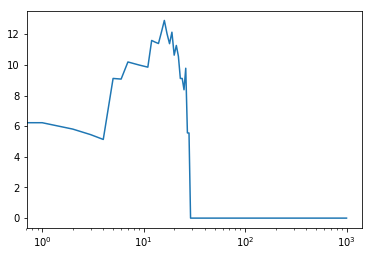

In [9]:
plt.plot(out.loss)
plt.xscale('log')

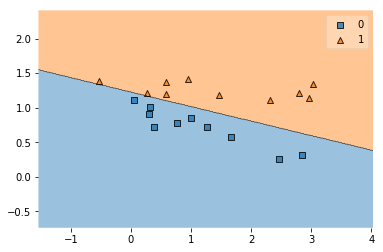

In [10]:
plot_decision_regions(x, y, clf=log)